In [99]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# Machine Learning Example Case: 
House Sale Price Prediction (like Zillow's "zestimate") 

When you see a line starting with "TASK", do that task!

### TASK: Click on the next cell and press shift-enter
You will get the code in it get executed.   
The result of last command or representation of last varible in that cell will be displayed 

In [2]:
import pandas as pd
housing = pd.read_csv('/Users/cartersears/Documents/housing_processed.csv')
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,GarageType_NA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,65.0,8450,7,5,2003,2003,196.0,Gd,...,0,0,0,0,0,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,TA,...,0,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,Gd,...,0,0,0,0,0,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,TA,...,0,0,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,Gd,...,0,0,0,0,0,0,0,0,0,1


### Filtering Columns
Some columns were not removed when equivalent coded ones were created

In [3]:
housing[["ExterQual","ExterQual_Coded"]].head()

,ExterQual,ExterQual_Coded
0,Gd,3
1,TA,2
2,Gd,3
3,TA,2
4,Gd,3


### Filtering in a series
dtypes returns a series   
filtering series and dataframes are similar

In [4]:
type(housing.dtypes==object)

pandas.core.series.Series

In [5]:
housing.dtypes[housing.dtypes==object]

ExterQual       object
ExterCond       object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
HeatingQC       object
CentralAir      object
KitchenQual     object
Functional      object
FireplaceQu     object
GarageFinish    object
GarageQual      object
GarageCond      object
PavedDrive      object
dtype: object

In [6]:
housing.dtypes[housing.dtypes==object].shape

(16,)

In [7]:
"SalePrice" in housing.columns 

True

### Removing Undesired Columns
In my case, my colleague had left above non-numeric columns in preprocessing, after creating corresponding coded versions

In [8]:
len(housing.columns)

238

In [9]:
# We could drop columns by name:
housing_ml = housing.drop(columns=["ExterQual"])

In [10]:
# or wholesale, keeping only numeric:
housing_ml = housing.loc[:,housing.dtypes != object]

In [11]:
len(housing_ml.columns)

222

# Separate Target into new Variable
- "SalePrice" is the target.    
 - The value we want to predict from other values (features) for a house.  
- Currently it is a column like the other features.   
- Scikit-learn needs 2 variables: features (X) and target (y) to be Predicted into its own 1-D array 

# NumPy
- Both Pandas and scikit-learn are build on top of NumPy
- scikit-learn can not directly work on dataframes
- X and y data type needs to be NumPy "ndarrays"

In [12]:
housing_ml.shape

(1460, 222)

In [13]:
# Split data as features and target
# take "SalePrice" values into its own 1-D array 
sale_price = housing_ml.pop('SalePrice')
type(sale_price)

pandas.core.series.Series

In [14]:
# pop removes the column
# "in place" operation
# now housing_ml has one less column
housing_ml.shape

(1460, 221)

In [15]:
y = sale_price
type(y)

pandas.core.series.Series

# See what other methods are available for ndarray

In [16]:
# press tab after putting cursor after dot "."
#y. #uncomment, press tab after . 

In [17]:
y.shape
# (1460,)
# it is equivalent to (1460)
# means it is a 1-d array

(1460,)

### TASK: get ndarray version of feature dataframe put it onto variable X

In [18]:
X = housing_ml

### TASK: check the shape of X

In [19]:
X.shape

(1460, 221)

### TASK: programmatically check if X and y has matching number of rows
You

In [20]:
X.shape[0] == y.shape[0]

True

# First Model
Q: What would you do if you had no features?

A: You would always estimatate the average house price.

We will have to do much better than that.  
We have so much data to base our decision on.   
It can still serve us as a baseline to compare.   
An inferior baseline could be: random in the range or max and min in training data. 

In [21]:
# Import estimator
from sklearn.dummy import DummyRegressor
# Instantiate estimator
# guess the mean every single time
mean_reg = DummyRegressor(strategy='mean')
# fit estimator
mean_reg.fit(X, y)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [22]:
# predict
mean_reg.predict(X)

array([180921.19589041, 180921.19589041, 180921.19589041, ...,
       180921.19589041, 180921.19589041, 180921.19589041])

## Evaluating The Model
scikit-learn regressors have a score function.   
It gives you how much better your model does compared to worst model
Technically: what percentage of the variance has decreased over the worst model

"Mean" *is* the worst model, so its score will be 0.

In [23]:
mean_reg.score(X, y)

0.0

## Fitting a linear model 
First, let's use only one feature 

In [24]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [25]:
X_lf = housing_ml[['LotFrontage']]

In [26]:
linear_model.fit(X_lf, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Above, you see that it used defaults to create the estimator.   
You could google "LinearRegression sklearn" and find the documentation:
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
to see the options for the other parameters.

In [27]:
y_pred = linear_model.predict(X_lf)

In [28]:
linear_model.score(X_lf, y)

0.11215612336205616

### Chart Showing the Linear Fit
matplotlib is the most common visualization library

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

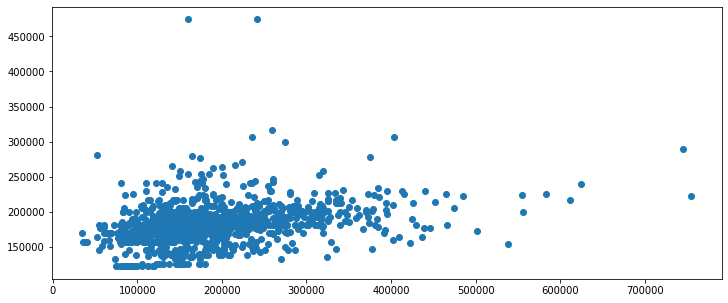

In [30]:
plt.figure(figsize=(12, 5))
plt.scatter(y, y_pred);

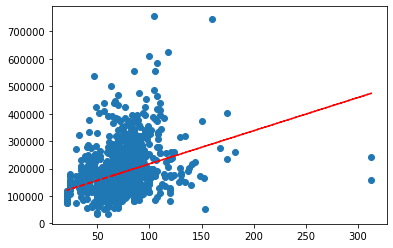

In [31]:
plt.scatter(X_lf,y)
plt.plot(X_lf,y_pred,'r--')

### TASK: add labels to these charts
search label:
https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py


### Task: try replacing scatter with plot
Do you see why scatter is needed for data rows.
Try also replacing plot with scatter. 

# Effect of using a Better predictor 
Ground Living Area should be better than Lot Frontage!

In [32]:
X_area = housing_ml[['GrLivArea']]

In [33]:
linear_model.fit(X_area, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now the linear_model has another model in it

In [34]:
y_pred2 = linear_model.predict(X_area)
linear_model.score(X_area, y)

0.5021486502718042

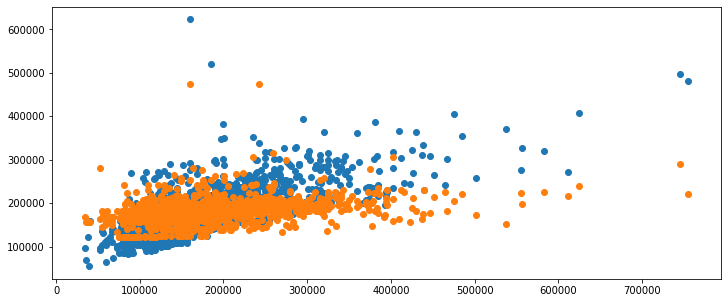

In [35]:
plt.figure(figsize=(12, 5))
plt.scatter(y, y_pred2); # blue obviously better
plt.scatter(y, y_pred); # orange

### TASK: add legend
which color is the prediction based on which feature

# Using all predictors!

In [36]:
# We had 81 columns (80 features) in original dataset,
# coded as 221 features!
X.shape

(1460, 221)

In [37]:
linear_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_pred3 = linear_model.predict(X)

In [39]:
linear_model.score(X, y)

0.918472889091411

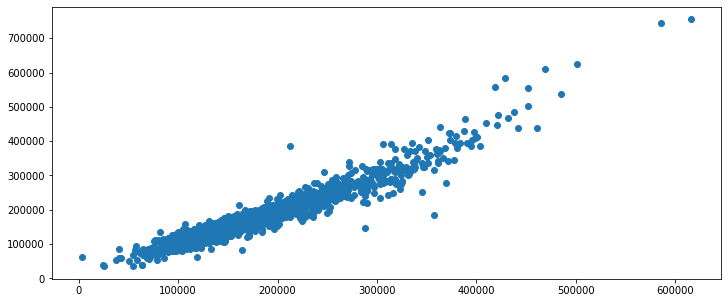

In [40]:
plt.figure(figsize=(12, 5))
plt.scatter(y_pred3, y);

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

In [42]:
train_test_split(y, shuffle=False)

[0       208500
 1       181500
 2       223500
 3       140000
 4       250000
          ...  
 1090     92900
 1091    160000
 1092    136500
 1093    146000
 1094    129000
 Name: SalePrice, Length: 1095, dtype: int64,
 1095    176432
 1096    127000
 1097    170000
 1098    128000
 1099    157000
          ...  
 1455    175000
 1456    210000
 1457    266500
 1458    142125
 1459    147500
 Name: SalePrice, Length: 365, dtype: int64]

## Loop generating scores of each feature alone

In [43]:
dicts = {}
for col in X_train.columns:
    pred = X_train[[col]]
    pred2 = X_test[[col]]
    linear_model.fit(pred, y_train)
    y_pred = linear_model.predict(pred)
    score = linear_model.score(pred2, y_test)
    print(col,' : ', score)
    dicts[col] = score

Id  :  -0.0008072067830384722
MSSubClass  :  0.009706020526556114
LotFrontage  :  0.11448119467464635
LotArea  :  0.07923143765942865
OverallQual  :  0.6454631197278844
OverallCond  :  -0.00796290433712965
YearBuilt  :  0.28938848027458564
YearRemodAdd  :  0.26876785230268385
MasVnrArea  :  0.22616708683842457
BsmtFinSF1  :  0.15071819017164356
BsmtFinSF2  :  -0.0028772376687113965
BsmtUnfSF  :  0.081095831952405
TotalBsmtSF  :  0.42491266111423953
1stFlrSF  :  0.4166679048480356
2ndFlrSF  :  0.04143754561525693
LowQualFinSF  :  0.0012553163707905712
GrLivArea  :  0.4442896667814059
BsmtFullBath  :  0.016171601613420572
BsmtHalfBath  :  -0.005935026640981
FullBath  :  0.2832024749049453
HalfBath  :  0.050411616658065705
BedroomAbvGr  :  0.010815735894967538
KitchenAbvGr  :  0.012397644841210531
TotRmsAbvGrd  :  0.23844007135695522
Fireplaces  :  0.22530812112691867
GarageCars  :  0.41193116659665807
GarageArea  :  0.4073263621599066
WoodDeckSF  :  0.12111874393492539
OpenPorchSF  :  0.

In [44]:
DictsSorted = sorted(dicts.items(), key = lambda x: x[1], reverse = True)

In [45]:
DictsSorted[0:10]

[('OverallQual', 0.6454631197278844),
 ('ExterQual_Coded', 0.49917534712671535),
 ('GrLivArea', 0.4442896667814059),
 ('KitchenQual_Coded', 0.43970293723342646),
 ('TotalBsmtSF', 0.42491266111423953),
 ('1stFlrSF', 0.4166679048480356),
 ('GarageCars', 0.41193116659665807),
 ('GarageArea', 0.4073263621599066),
 ('BsmtQual_Coded', 0.3409700148262619),
 ('GarageFinish_Coded', 0.31628495442245047)]

In [46]:
PredList = ['OverallQual','ExterQual_Coded', 'GrLivArea', 'KitchenQual_Coded', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 'BsmtQual_Coded', 'GarageFinish_Coded']
pairs = [(a, b) for idx, a in enumerate(PredList) for b in PredList[idx + 1:]]

In [47]:
pairs

[('OverallQual', 'ExterQual_Coded'),
 ('OverallQual', 'GrLivArea'),
 ('OverallQual', 'KitchenQual_Coded'),
 ('OverallQual', 'TotalBsmtSF'),
 ('OverallQual', '1stFlrSF'),
 ('OverallQual', 'GarageCars'),
 ('OverallQual', 'GarageArea'),
 ('OverallQual', 'BsmtQual_Coded'),
 ('OverallQual', 'GarageFinish_Coded'),
 ('ExterQual_Coded', 'GrLivArea'),
 ('ExterQual_Coded', 'KitchenQual_Coded'),
 ('ExterQual_Coded', 'TotalBsmtSF'),
 ('ExterQual_Coded', '1stFlrSF'),
 ('ExterQual_Coded', 'GarageCars'),
 ('ExterQual_Coded', 'GarageArea'),
 ('ExterQual_Coded', 'BsmtQual_Coded'),
 ('ExterQual_Coded', 'GarageFinish_Coded'),
 ('GrLivArea', 'KitchenQual_Coded'),
 ('GrLivArea', 'TotalBsmtSF'),
 ('GrLivArea', '1stFlrSF'),
 ('GrLivArea', 'GarageCars'),
 ('GrLivArea', 'GarageArea'),
 ('GrLivArea', 'BsmtQual_Coded'),
 ('GrLivArea', 'GarageFinish_Coded'),
 ('KitchenQual_Coded', 'TotalBsmtSF'),
 ('KitchenQual_Coded', '1stFlrSF'),
 ('KitchenQual_Coded', 'GarageCars'),
 ('KitchenQual_Coded', 'GarageArea'),
 ('Kit

## 45 Models using every possible pair of the top 10 predictors

In [48]:
#1
linear_model.fit(X_train[['OverallQual', 'ExterQual_Coded']], y_train)
linear_model.predict(X_train[['OverallQual', 'ExterQual_Coded']])
score = linear_model.score(X_test[['OverallQual', 'ExterQual_Coded']], y_test)
print('OverallQual & ExterQual_Coded: ',score)

OverallQual & ExterQual_Coded:  0.6680147343521529


In [49]:
#2
linear_model.fit(X_train[['OverallQual', 'GrLivArea']], y_train)
linear_model.predict(X_train[['OverallQual', 'GrLivArea']])
score = linear_model.score(X_test[['OverallQual', 'GrLivArea']], y_test)
print('OverallQual & GrLivArea: ',score)

OverallQual & GrLivArea:  0.6921986779040231


In [50]:
#3
linear_model.fit(X_train[['OverallQual', 'KitchenQual_Coded']], y_train)
linear_model.predict(X_train[['OverallQual', 'KitchenQual_Coded']])
score = linear_model.score(X_test[['OverallQual', 'KitchenQual_Coded']], y_test)
print('OverallQual & KitchenQual_Coded: ',score)

OverallQual & KitchenQual_Coded:  0.673086953607461


In [51]:
#4
linear_model.fit(X_train[['OverallQual', 'TotalBsmtSF']], y_train)
linear_model.predict(X_train[['OverallQual', 'TotalBsmtSF']])
score = linear_model.score(X_test[['OverallQual', 'TotalBsmtSF']], y_test)
print('OverallQual & TotalBsmtSF: ',score)

OverallQual & TotalBsmtSF:  0.706791108152437


In [52]:
#5
linear_model.fit(X_train[['OverallQual', '1stFlrSF']], y_train)
linear_model.predict(X_train[['OverallQual', '1stFlrSF']])
score = linear_model.score(X_test[['OverallQual', '1stFlrSF']], y_test)
print('OverallQual & 1stFlrSF: ',score)

OverallQual & 1stFlrSF:  0.7173882583039418


In [53]:
#6
linear_model.fit(X_train[['OverallQual', 'GarageCars']], y_train)
linear_model.predict(X_train[['OverallQual', 'GarageCars']])
score = linear_model.score(X_test[['OverallQual', 'GarageCars']], y_test)
print('OverallQual & GarageCars: ',score)

OverallQual & GarageCars:  0.6723247870365776


In [54]:
#7
linear_model.fit(X_train[['OverallQual', 'GarageArea']], y_train)
linear_model.predict(X_train[['OverallQual', 'GarageArea']])
score = linear_model.score(X_test[['OverallQual', 'GarageArea']], y_test)
print('OverallQual & GarageArea: ',score)

OverallQual & GarageArea:  0.6813946935673894


In [55]:
#8
linear_model.fit(X_train[['OverallQual', 'BsmtQual_Coded']], y_train)
linear_model.predict(X_train[['OverallQual', 'BsmtQual_Coded']])
score = linear_model.score(X_test[['OverallQual', 'BsmtQual_Coded']], y_test)
print('OverallQual & BsmtQual_Coded: ',score)

OverallQual & BsmtQual_Coded:  0.6566660974647345


In [56]:
#9
linear_model.fit(X_train[['OverallQual', 'GarageFinish_Coded']], y_train)
linear_model.predict(X_train[['OverallQual', 'GarageFinish_Coded']])
score = linear_model.score(X_test[['OverallQual', 'GarageFinish_Coded']], y_test)
print('OverallQual & GarageFinish_Coded: ',score)

OverallQual & GarageFinish_Coded:  0.6519020465859777


In [57]:
#10
linear_model.fit(X_train[['ExterQual_Coded', 'GrLivArea']], y_train)
linear_model.predict(X_train[['ExterQual_Coded', 'GrLivArea']])
score = linear_model.score(X_test[['ExterQual_Coded', 'GrLivArea']], y_test)
print('ExterQual_Coded & GrLivArea: ',score)

ExterQual_Coded & GrLivArea:  0.6347813176873235


In [58]:
#11
linear_model.fit(X_train[['ExterQual_Coded', 'KitchenQual_Coded']], y_train)
linear_model.predict(X_train[['ExterQual_Coded', 'KitchenQual_Coded']])
score = linear_model.score(X_test[['ExterQual_Coded', 'KitchenQual_Coded']], y_test)
print('ExterQual_Coded & KitchenQual_Coded: ',score)

ExterQual_Coded & KitchenQual_Coded:  0.5614795448182023


In [59]:
#12
linear_model.fit(X_train[['ExterQual_Coded', 'TotalBsmtSF']], y_train)
linear_model.predict(X_train[['ExterQual_Coded', 'TotalBsmtSF']])
score = linear_model.score(X_test[['ExterQual_Coded', 'TotalBsmtSF']], y_test)
print('ExterQual_Coded & TotalBsmtSF: ',score)

ExterQual_Coded & TotalBsmtSF:  0.623021198005789


In [60]:
#13
linear_model.fit(X_train[['ExterQual_Coded', '1stFlrSF']], y_train)
linear_model.predict(X_train[['ExterQual_Coded', '1stFlrSF']])
score = linear_model.score(X_test[['ExterQual_Coded', '1stFlrSF']], y_test)
print('ExterQual_Coded & 1stFlrSF: ',score)

ExterQual_Coded & 1stFlrSF:  0.6364054863411375


In [61]:
#14
linear_model.fit(X_train[['ExterQual_Coded', 'GarageCars']], y_train)
linear_model.predict(X_train[['ExterQual_Coded', 'GarageCars']])
score = linear_model.score(X_test[['ExterQual_Coded', 'GarageCars']], y_test)
print('ExterQual_Coded & GarageCars: ',score)

ExterQual_Coded & GarageCars:  0.5958751919482281


In [62]:
#15
linear_model.fit(X_train[['ExterQual_Coded', 'GarageArea']], y_train)
linear_model.predict(X_train[['ExterQual_Coded', 'GarageArea']])
score = linear_model.score(X_test[['ExterQual_Coded', 'GarageArea']], y_test)
print('ExterQual_Coded & GarageArea: ',score)

ExterQual_Coded & GarageArea:  0.5993679075736751


In [63]:
#16
linear_model.fit(X_train[['ExterQual_Coded', 'BsmtQual_Coded']], y_train)
linear_model.predict(X_train[['ExterQual_Coded', 'BsmtQual_Coded']])
score = linear_model.score(X_test[['ExterQual_Coded', 'BsmtQual_Coded']], y_test)
print('ExterQual_Coded & BsmtQual_Coded: ',score)

ExterQual_Coded & BsmtQual_Coded:  0.5450531167248083


In [64]:
#17
linear_model.fit(X_train[['ExterQual_Coded', 'GarageFinish_Coded']], y_train)
linear_model.predict(X_train[['ExterQual_Coded', 'GarageFinish_Coded']])
score = linear_model.score(X_test[['ExterQual_Coded', 'GarageFinish_Coded']], y_test)
print('ExterQual_Coded & GarageFinish_Coded: ',score)

ExterQual_Coded & GarageFinish_Coded:  0.5502972235709231


In [65]:
#18
linear_model.fit(X_train[['GrLivArea', 'KitchenQual_Coded']], y_train)
linear_model.predict(X_train[['GrLivArea', 'KitchenQual_Coded']])
score = linear_model.score(X_test[['GrLivArea', 'KitchenQual_Coded']], y_test)
print('GrLivArea', 'KitchenQual_Coded: ',score)

GrLivArea KitchenQual_Coded:  0.6069024711847932


In [66]:
#19
linear_model.fit(X_train[['GrLivArea', 'TotalBsmtSF']], y_train)
linear_model.predict(X_train[['GrLivArea', 'TotalBsmtSF']])
score = linear_model.score(X_test[['GrLivArea', 'TotalBsmtSF']], y_test)
print('GrLivArea & TotalBsmtSF: ',score)

GrLivArea & TotalBsmtSF:  0.5711932027269213


In [67]:
#20
linear_model.fit(X_train[['GrLivArea', '1stFlrSF']], y_train)
linear_model.predict(X_train[['GrLivArea', '1stFlrSF']])
score = linear_model.score(X_test[['GrLivArea', '1stFlrSF']], y_test)
print('GrLivArea & 1stFlrSF: ',score)

GrLivArea & 1stFlrSF:  0.5248920905023893


In [68]:
#21
linear_model.fit(X_train[['GrLivArea', 'GarageCars']], y_train)
linear_model.predict(X_train[['GrLivArea', 'GarageCars']])
score = linear_model.score(X_test[['GrLivArea', 'GarageCars']], y_test)
print('GrLivArea & GarageCars: ',score)

GrLivArea & GarageCars:  0.5966866179721507


In [69]:
#22
linear_model.fit(X_train[['GrLivArea', 'GarageArea']], y_train)
linear_model.predict(X_train[['GrLivArea', 'GarageArea']])
score = linear_model.score(X_test[['GrLivArea', 'GarageArea']], y_test)
print('GrLivArea & GarageArea: ',score)

GrLivArea & GarageArea:  0.59607195218783


In [70]:
#23
linear_model.fit(X_train[['GrLivArea', 'BsmtQual_Coded']], y_train)
linear_model.predict(X_train[['GrLivArea', 'BsmtQual_Coded']])
score = linear_model.score(X_test[['GrLivArea', 'BsmtQual_Coded']], y_test)
print('GrLivArea & BsmtQual_Coded: ',score)

GrLivArea & BsmtQual_Coded:  0.5812685358678369


In [71]:
#24
linear_model.fit(X_train[['GrLivArea', 'GarageFinish_Coded']], y_train)
linear_model.predict(X_train[['GrLivArea', 'GarageFinish_Coded']])
score = linear_model.score(X_test[['GrLivArea', 'GarageFinish_Coded']], y_test)
print('GrLivArea & GarageFinish_Coded: ',score)

GrLivArea & GarageFinish_Coded:  0.5443956805719437


In [72]:
#25
linear_model.fit(X_train[['KitchenQual_Coded', 'TotalBsmtSF']], y_train)
linear_model.predict(X_train[['KitchenQual_Coded', 'TotalBsmtSF']])
score = linear_model.score(X_test[['KitchenQual_Coded', 'TotalBsmtSF']], y_test)
print('KitchenQual_Coded & TotalBsmtSF: ',score)

KitchenQual_Coded & TotalBsmtSF:  0.5990455792408331


In [73]:
#26
linear_model.fit(X_train[['KitchenQual_Coded', '1stFlrSF']], y_train)
linear_model.predict(X_train[['KitchenQual_Coded', '1stFlrSF']])
score = linear_model.score(X_test[['KitchenQual_Coded', '1stFlrSF']], y_test)
print('KitchenQual_Coded & 1stFlrSF: ',score)

KitchenQual_Coded & 1stFlrSF:  0.5968792254270976


In [74]:
#27
linear_model.fit(X_train[['KitchenQual_Coded', 'GarageCars']], y_train)
linear_model.predict(X_train[['KitchenQual_Coded', 'GarageCars']])
score = linear_model.score(X_test[['KitchenQual_Coded', 'GarageCars']], y_test)
print('KitchenQual_Coded & GarageCars: ',score)

KitchenQual_Coded & GarageCars:  0.567833521710212


In [75]:
#28
linear_model.fit(X_train[['KitchenQual_Coded', 'GarageArea']], y_train)
linear_model.predict(X_train[['KitchenQual_Coded', 'GarageArea']])
score = linear_model.score(X_test[['KitchenQual_Coded', 'GarageArea']], y_test)
print('KitchenQual_Coded & GarageArea: ',score)

KitchenQual_Coded & GarageArea:  0.557445318929163


In [76]:
#29
linear_model.fit(X_train[['KitchenQual_Coded', 'BsmtQual_Coded']], y_train)
linear_model.predict(X_train[['KitchenQual_Coded', 'BsmtQual_Coded']])
score = linear_model.score(X_test[['KitchenQual_Coded', 'BsmtQual_Coded']], y_test)
print('KitchenQual_Coded & BsmtQual_Coded: ',score)

KitchenQual_Coded & BsmtQual_Coded:  0.5328594837350534


In [77]:
#30
linear_model.fit(X_train[['KitchenQual_Coded', 'GarageFinish_Coded']], y_train)
linear_model.predict(X_train[['KitchenQual_Coded', 'GarageFinish_Coded']])
score = linear_model.score(X_test[['KitchenQual_Coded', 'GarageFinish_Coded']], y_test)
print('KitchenQual_Coded & GarageFinish_Coded: ',score)

KitchenQual_Coded & GarageFinish_Coded:  0.5254571772774448


In [78]:
#31
linear_model.fit(X_train[['TotalBsmtSF', '1stFlrSF']], y_train)
linear_model.predict(X_train[['TotalBsmtSF', '1stFlrSF']])
score = linear_model.score(X_test[['TotalBsmtSF', '1stFlrSF']], y_test)
print('TotalBsmtSF & 1stFlrSF: ',score)

TotalBsmtSF & 1stFlrSF:  0.45421260952689835


In [79]:
#32
linear_model.fit(X_train[['TotalBsmtSF', 'GarageCars']], y_train)
linear_model.predict(X_train[['TotalBsmtSF', 'GarageCars']])
score = linear_model.score(X_test[['TotalBsmtSF', 'GarageCars']], y_test)
print('TotalBsmtSF & GarageCars: ',score)

TotalBsmtSF & GarageCars:  0.5573159943855633


In [80]:
#33
linear_model.fit(X_train[['TotalBsmtSF', 'GarageArea']], y_train)
linear_model.predict(X_train[['TotalBsmtSF', 'GarageArea']])
score = linear_model.score(X_test[['TotalBsmtSF', 'GarageArea']], y_test)
print('TotalBsmtSF & GarageArea: ',score)

TotalBsmtSF & GarageArea:  0.5381252811630992


In [81]:
#34
linear_model.fit(X_train[['TotalBsmtSF', 'BsmtQual_Coded']], y_train)
linear_model.predict(X_train[['TotalBsmtSF', 'BsmtQual_Coded']])
score = linear_model.score(X_test[['TotalBsmtSF', 'BsmtQual_Coded']], y_test)
print('TotalBsmtSF & BsmtQual_Coded: ',score)

TotalBsmtSF & BsmtQual_Coded:  0.5012165203950788


In [82]:
#35
linear_model.fit(X_train[['TotalBsmtSF', 'GarageFinish_Coded']], y_train)
linear_model.predict(X_train[['TotalBsmtSF', 'GarageFinish_Coded']])
score = linear_model.score(X_test[['TotalBsmtSF', 'GarageFinish_Coded']], y_test)
print('TotalBsmtSF & GarageFinish_Coded: ',score)

TotalBsmtSF & GarageFinish_Coded:  0.5474747523224235


In [83]:
#36
linear_model.fit(X_train[['1stFlrSF', 'GarageCars']], y_train)
linear_model.predict(X_train[['1stFlrSF', 'GarageCars']])
score = linear_model.score(X_test[['1stFlrSF', 'GarageCars']], y_test)
print('1stFlrSF & GarageCars: ',score)

1stFlrSF & GarageCars:  0.5591145233874982


In [84]:
#37
linear_model.fit(X_train[['1stFlrSF', 'GarageArea']], y_train)
linear_model.predict(X_train[['1stFlrSF', 'GarageArea']])
score = linear_model.score(X_test[['1stFlrSF', 'GarageArea']], y_test)
print('1stFlrSF & GarageArea: ',score)

1stFlrSF & GarageArea:  0.5422825807187134


In [85]:
#38
linear_model.fit(X_train[['1stFlrSF', 'BsmtQual_Coded']], y_train)
linear_model.predict(X_train[['1stFlrSF', 'BsmtQual_Coded']])
score = linear_model.score(X_test[['1stFlrSF', 'BsmtQual_Coded']], y_test)
print('1stFlrSF & BsmtQual_Coded: ',score)

1stFlrSF & BsmtQual_Coded:  0.5732205904418872


In [86]:
#39
linear_model.fit(X_train[['1stFlrSF', 'GarageFinish_Coded']], y_train)
linear_model.predict(X_train[['1stFlrSF', 'GarageFinish_Coded']])
score = linear_model.score(X_test[['1stFlrSF', 'GarageFinish_Coded']], y_test)
print('1stFlrSF & GarageFinish_Coded: ',score)

1stFlrSF & GarageFinish_Coded:  0.5400153833741016


In [87]:
#40
linear_model.fit(X_train[['GarageCars', 'GarageArea']], y_train)
linear_model.predict(X_train[['GarageCars', 'GarageArea']])
score = linear_model.score(X_test[['GarageCars', 'GarageArea']], y_test)
print('GarageCars & GarageArea: ',score)

GarageCars & GarageArea:  0.43290484443359156


In [88]:
#41
linear_model.fit(X_train[['GarageCars', 'BsmtQual_Coded']], y_train)
linear_model.predict(X_train[['GarageCars', 'BsmtQual_Coded']])
score = linear_model.score(X_test[['GarageCars', 'BsmtQual_Coded']], y_test)
print('GarageCars & BsmtQual_Coded: ',score)

GarageCars & BsmtQual_Coded:  0.5190330795524087


In [89]:
#42
linear_model.fit(X_train[['GarageCars', 'GarageFinish_Coded']], y_train)
linear_model.predict(X_train[['GarageCars', 'GarageFinish_Coded']])
score = linear_model.score(X_test[['GarageCars', 'GarageFinish_Coded']], y_test)
print('GarageCars & GarageFinish_Coded: ',score)

GarageCars & GarageFinish_Coded:  0.45935281097583014


In [90]:
#43
linear_model.fit(X_train[['GarageArea', 'BsmtQual_Coded']], y_train)
linear_model.predict(X_train[['GarageArea', 'BsmtQual_Coded']])
score = linear_model.score(X_test[['GarageArea', 'BsmtQual_Coded']], y_test)
print('GarageArea & BsmtQual_Coded: ',score)

GarageArea & BsmtQual_Coded:  0.5228645856492856


In [91]:
#44
linear_model.fit(X_train[['GarageArea', 'GarageFinish_Coded']], y_train)
linear_model.predict(X_train[['GarageArea', 'GarageFinish_Coded']])
score = linear_model.score(X_test[['GarageArea', 'GarageFinish_Coded']], y_test)
print('GarageArea & GarageFinish_Coded: ',score)

GarageArea & GarageFinish_Coded:  0.4757489497506129


In [92]:
#45
linear_model.fit(X_train[['BsmtQual_Coded', 'GarageFinish_Coded']], y_train)
linear_model.predict(X_train[['BsmtQual_Coded', 'GarageFinish_Coded']])
score = linear_model.score(X_test[['BsmtQual_Coded', 'GarageFinish_Coded']], y_test)
print('BsmtQual_Coded & GarageFinish_Coded: ',score)

BsmtQual_Coded & GarageFinish_Coded:  0.44048257366049814


## Model using all features

In [93]:
linear_model.fit(X_train, y_train)
y_pred2 = linear_model.predict(X_test)
linear_model.score(X_test, y_test)

0.8127547098528047

In [94]:
linear_model.fit(X_train[['BsmtQual_Coded', 'GarageFinish_Coded', 'OverallQual', 'ExterQual_Coded', 'GrLivArea', 'KitchenQual_Coded', 'TotalBsmtSF', '1stFlrSF', 'TotalBsmtSF', '1stFlrSF']], y_train)
linear_model.predict(X_train[['BsmtQual_Coded', 'GarageFinish_Coded', 'OverallQual', 'ExterQual_Coded', 'GrLivArea', 'KitchenQual_Coded', 'TotalBsmtSF', '1stFlrSF', 'TotalBsmtSF', '1stFlrSF']])
score = linear_model.score(X_test[['BsmtQual_Coded', 'GarageFinish_Coded', 'OverallQual', 'ExterQual_Coded', 'GrLivArea', 'KitchenQual_Coded', 'TotalBsmtSF', '1stFlrSF', 'TotalBsmtSF', '1stFlrSF']], y_test)
print(score)

0.7534186442105405


In [95]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [96]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [97]:
y_pred = neigh.predict(X_test)

In [100]:
print(metrics.accuracy_score(y_test, y_pred))

0.00684931506849315


In [101]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.003424657534246575


## Linear Regression was better for inference